In [224]:
import numpy as np
import hist
import matplotlib.pyplot as plt
from wremnants import plot_tools, theory_corrections,theory_tools,input_tools,common
from wremnants import boostHistHelpers as hh, histselections as sel

In [225]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [252]:
def rebin_for_coeffs(h):
    axes = ("pt", "absy")
    if not axes[0] in h.axes.name:
        axes = ("ptVgen", "absYVgen")
    h = hh.rebinHist(h, axes[0], common.ptV_binning[:-2])
    h = hh.rebinHist(h, axes[1], [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4])
    return h

In [18]:
minnlo_file = "../w_z_gen_dists.pkl.lz4"
minnloZhel = input_tools.read_and_scale(minnlo_file, "ZmumuPostVFP", "helicity_moments_scale")
minnloWhel = input_tools.read_all_and_scale(minnlo_file, ["WplusmunuPostVFP", "WminusmunuPostVFP"], "helicity_moments_scale")

In [263]:
scetlibZ_sigma4 = hh.makeAbsHist(input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Z/inclusive_Z_pT_A4.npz", nonsing="", flip_y_sign=True), "y")
scetlibWm_sigma4 = hh.makeAbsHist(input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wm/inclusive_Wm_A4.npz", flip_y_sign=True), "y")
scetlibWp_sigma4 = hh.makeAbsHist(input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wp/inclusive_Wp_A4.pkl", nonsing="", flip_y_sign=True), "y")

In [264]:
scetlibWm_tot = hh.makeAbsHist(input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wm/inclusive_Wm.npz"), "y")
scetlibWp_tot = hh.makeAbsHist(input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wp/inclusive_Wp.pkl", nonsing=""), "y")

In [116]:
minnloZhel_scaled = theory_tools.scale_angular_moments(minnloZhel)
minnloWhel_scaled = theory_tools.scale_angular_moments(minnloWhel)

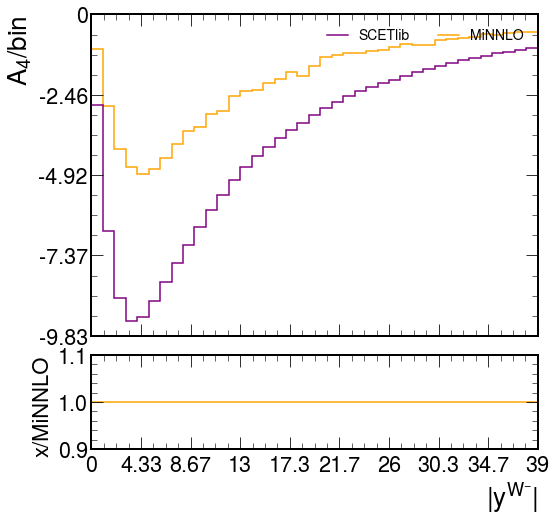

In [230]:
scetlib_sigma4_pt = scetlibZ_a4.project("pt")
minnlo_sigma4_pt = minnloZhel_scaled[{"muRfact" : 1.j, "muFfact" : 1.j, "helicity" : 4.j}].project("ptVgen")
to_plot = hh.rebinHistsToCommon([minnlo_sigma4_pt, scetlib_sigma4_pt,], 0)
fig = plot_tools.makePlotWithRatioToRef(to_plot, colors=["orange", "purple",], rlabel="x/MiNNLO", ylabel="A$_{4}$/bin", xlabel=r"$|\mathrm{y}^{\mathrm{W}^{-}}|$", labels=["MiNNLO", "SCETlib"], rrange=[0.9, 1.1], binwnorm=1.)

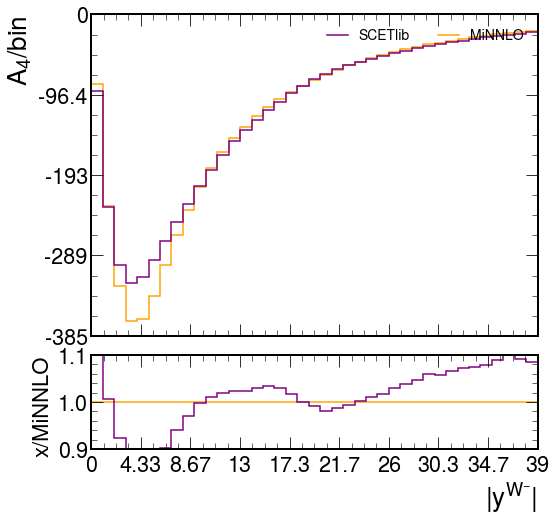

In [232]:
scetlib_sigma4_pt = scetlibWm_sigma4.project("pt")
minnlo_sigma4_pt = minnloWhel_scaled[{"muRfact" : 1.j, "muFfact" : 1.j, "helicity" : 4.j, "chargeVgen" : -1.j}].project("ptVgen")
to_plot = hh.rebinHistsToCommon([minnlo_sigma4_pt, scetlib_sigma4_pt,], 0)
fig = plot_tools.makePlotWithRatioToRef(to_plot, colors=["orange", "purple",], rlabel="x/MiNNLO", ylabel="A$_{4}$/bin", xlabel=r"$|\mathrm{y}^{\mathrm{W}^{-}}|$", labels=["MiNNLO", "SCETlib"], rrange=[0.9, 1.1], binwnorm=1.)

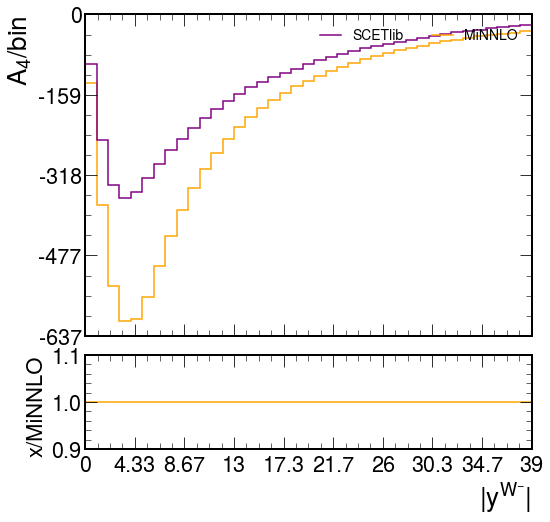

In [234]:
scetlib_sigma4_pt = scetlibWp_sigma4.project("pt")
minnlo_sigma4_pt = minnloWhel_scaled[{"muRfact" : 1.j, "muFfact" : 1.j, "helicity" : 4.j, "chargeVgen" : 1.j}].project("ptVgen")
to_plot = hh.rebinHistsToCommon([minnlo_sigma4_pt, scetlib_sigma4_pt,], 0)
fig = plot_tools.makePlotWithRatioToRef(to_plot, colors=["orange", "purple",], rlabel="x/MiNNLO", ylabel="A$_{4}$/bin", xlabel=r"$|\mathrm{y}^{\mathrm{W}^{-}}|$", labels=["MiNNLO", "SCETlib"], rrange=[0.9, 1.1], binwnorm=1.)

edges [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0]
edges_eval [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0]
len(edges_eval) 41
new_ax.size 40
flow True True
ax 0 shape (42,)
old ax 0 shape (122,)
edge_idx [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
(42,)
(42,)
40
edges [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0]
edges_eval [0.0, 1.0, 2.0

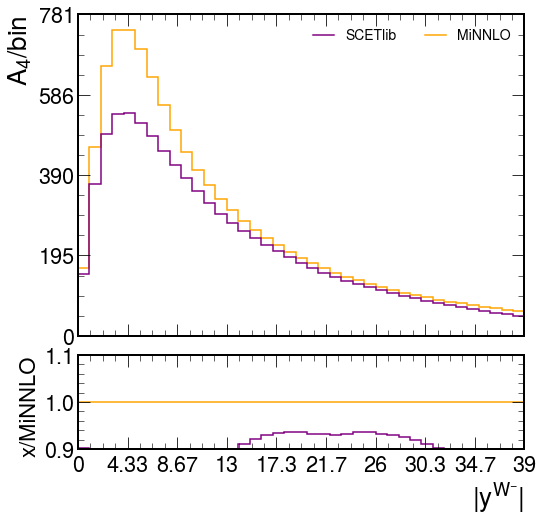

In [265]:
scetlib_pt = scetlibWp_tot.project("pt")
minnlo_pt = minnloWhel_scaled[{"muRfact" : 1.j, "muFfact" : 1.j, "helicity" : -1.j, "chargeVgen" : 1.j}].project("ptVgen")
to_plot = hh.rebinHistsToCommon([minnlo_pt, scetlib_pt,], 0)
fig = plot_tools.makePlotWithRatioToRef(to_plot, colors=["orange", "purple",], rlabel="x/MiNNLO", ylabel="A$_{4}$/bin", xlabel=r"$|\mathrm{y}^{\mathrm{W}^{-}}|$", labels=["MiNNLO", "SCETlib"], rrange=[0.9, 1.1], binwnorm=1.)

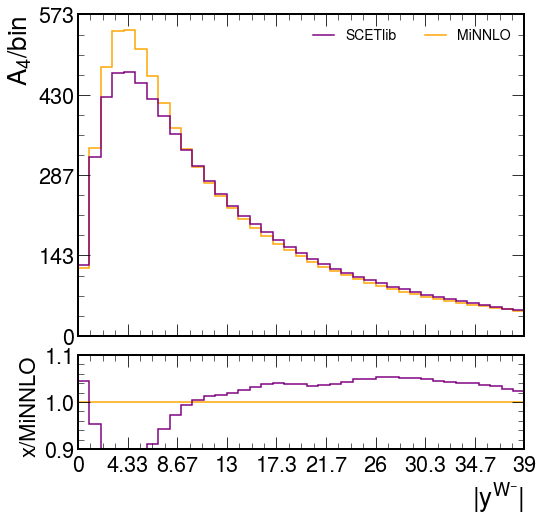

In [214]:
scetlib_pt = scetlibWm_tot.project("pt")
minnlo_pt = minnloWhel_scaled[{"muRfact" : 1.j, "muFfact" : 1.j, "helicity" : -1.j, "chargeVgen" : -1.j}].project("ptVgen")
to_plot = hh.rebinHistsToCommon([minnlo_pt, scetlib_pt,], 0)
fig = plot_tools.makePlotWithRatioToRef(to_plot, colors=["orange", "purple",], rlabel="x/MiNNLO", ylabel="A$_{4}$/bin", xlabel=r"$|\mathrm{y}^{\mathrm{W}^{-}}|$", labels=["MiNNLO", "SCETlib"], rrange=[0.9, 1.1], binwnorm=1.)

In [266]:
scetlibWp_sigma4 = hh.makeAbsHist(input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wp/inclusive_Wp_A4.pkl", nonsing="", flip_y_sign=True), "y")
scetlibWp_sigma4_nons = hh.makeAbsHist(input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wp/inclusive_Wp_A4_nons.pkl", nonsing="", flip_y_sign=True), "y")
scetlibWp = hh.makeAbsHist(input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wp/inclusive_Wp.pkl", nonsing=""), "y")
scetlibWp_nons = hh.makeAbsHist(input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wp/inclusive_Wp_nons.pkl", nonsing=""), "y")

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f925daca230>, errorbar=None, legend_artist=None)]

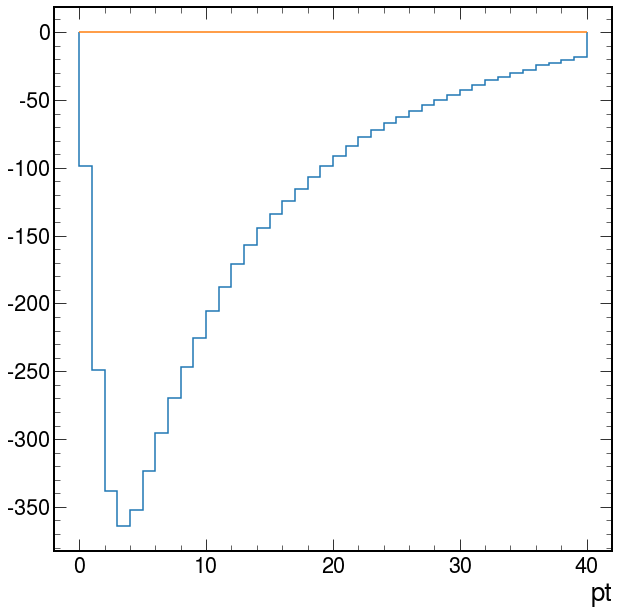

In [216]:
scetlibWp_sigma4.project("pt").plot(yerr=False)
scetlibWp_sigma4_nons.project("pt").plot(yerr=False)

In [254]:
scetlibWm_a4 = theory_corrections.make_a4_coeff(*[rebin_for_coeffs(x) for x in [scetlibWm_sigma4, scetlibWm_tot]])
scetlibWp_a4 = theory_corrections.make_a4_coeff(*[rebin_for_coeffs(x) for x in [scetlibWp_sigma4, scetlibWp_tot]])
scetlibWm_a4_pt = theory_corrections.make_a4_coeff(*[rebin_for_coeffs(x).project("pt") for x in [scetlibWm_sigma4, scetlibWm_tot]])
scetlibWp_a4_pt = theory_corrections.make_a4_coeff(*[rebin_for_coeffs(x).project("pt") for x in [scetlibWp_sigma4, scetlibWp_tot]])
minnloWcoeffs_pt = theory_tools.moments_to_angular_coeffs(rebin_for_coeffs(minnloWhel).project("ptVgen", "helicity", "chargeVgen"))
minnloWcoeffs = theory_tools.moments_to_angular_coeffs(rebin_for_coeffs(minnloWhel))

In [223]:
scetlibWm_a4

Hist(
  Variable([5, 13000], name='mass', label='mass'),
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4], name='absy', label='absy'),
  Variable([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 27, 32, 40], name='pt', label='pt'),
  Integer(0, 1, underflow=False, overflow=False, name='vars', label='vars'),
  storage=Weight()) # Sum: WeightedSum(value=-236.091, variance=165.669) (WeightedSum(value=492.448, variance=406.655) with flow)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f925caf6230>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

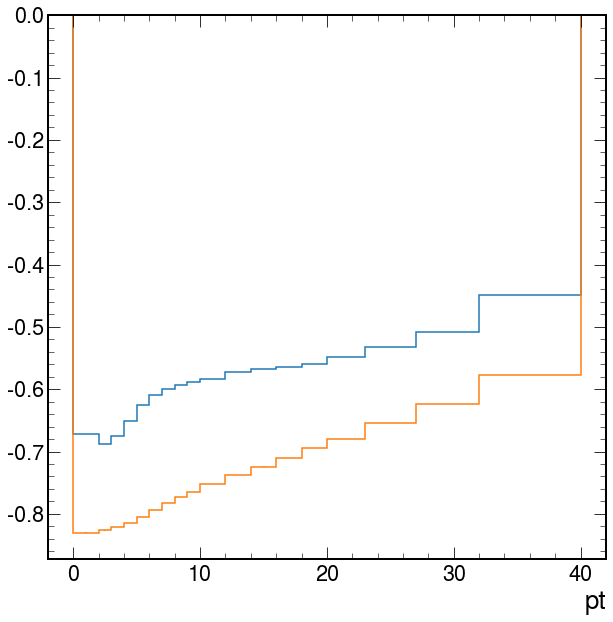

In [267]:
scetlibWp_a4_pt.plot(yerr=False)
minnloWcoeffs_pt[{"chargeVgen" : 1.j, "helicity" : 4.j}].plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f925d8fd3c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

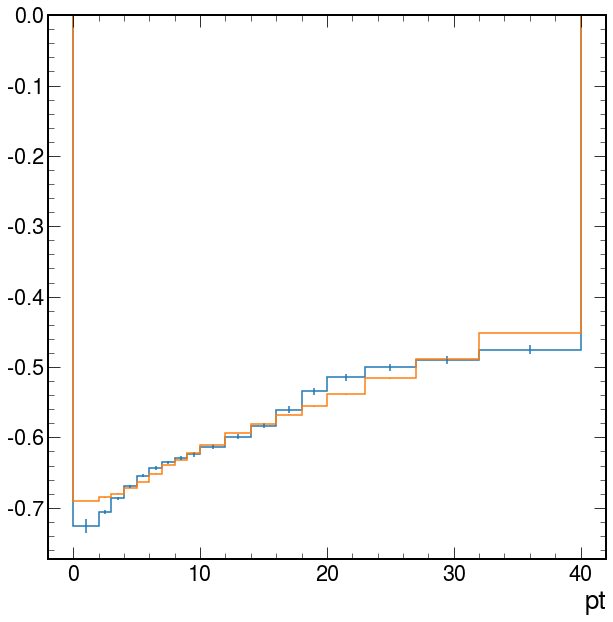

In [219]:
scetlibWm_a4_pt.plot()
minnloWcoeffs_pt[{"chargeVgen" : -1.j, "helicity" : 4.j}].plot()

In [177]:
corrdict = pickle.load(lz4.frame.open("../wremnants/data/TheoryCorrections/scetlibHelicityCorrW.pkl.lz4"))

In [256]:
minnloWcoeffs

Hist(
  Variable([0, inf], name='massVgen', label='massVgen'),
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4], name='absYVgen', label='absYVgen'),
  Variable([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 27, 32, 40], name='ptVgen', label='ptVgen'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  Integer(-1, 8, underflow=False, overflow=False, name='helicity', label='helicity'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muRfact', label='muRfact'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muFfact', label='muFfact'),
  storage=Weight()) # Sum: WeightedSum(value=2229.75, variance=82945.3) (WeightedSum(value=2591.45, variance=93028) with flow)

In [268]:
scetlibWm_a4_unrol = sel.unrolledHist(scetlibWm_a4, ("pt", "absy"))
minnloWm_a4_unrol = sel.unrolledHist(minnloWcoeffs[{"chargeVgen" : -1.j, "helicity" : 4.j, "muRfact" : 1.j, "muFfact" : 1.j}], ("ptVgen", "absYVgen"))

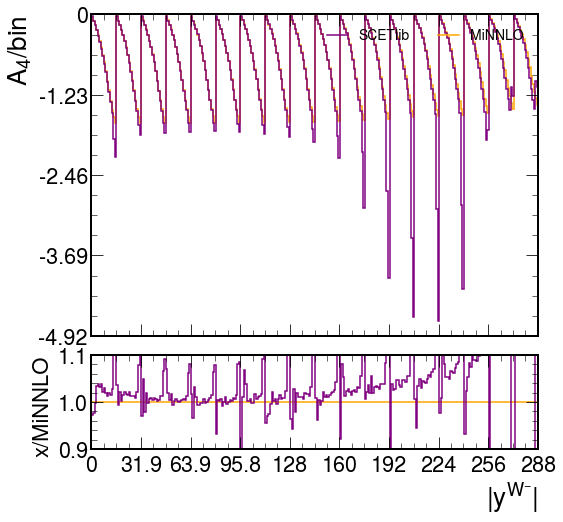

In [269]:
fig = plot_tools.makePlotWithRatioToRef([minnloWm_a4_unrol, scetlibWm_a4_unrol], colors=["orange", "purple",], rlabel="x/MiNNLO", ylabel="A$_{4}$/bin", xlabel=r"$|\mathrm{y}^{\mathrm{W}^{-}}|$", labels=["MiNNLO", "SCETlib"], rrange=[0.9, 1.1], binwnorm=1.)

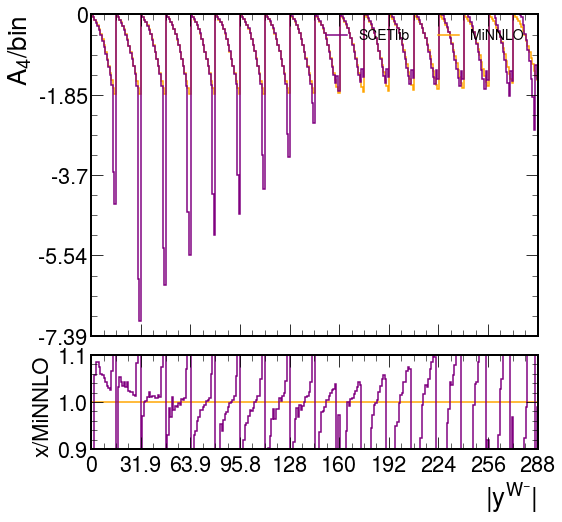

In [270]:
scetlibWp_a4_unrol = sel.unrolledHist(scetlibWp_a4, ("pt", "absy"))
minnloWp_a4_unrol = sel.unrolledHist(minnloWcoeffs[{"chargeVgen" : 1.j, "helicity" : 4.j, "muRfact" : 1.j, "muFfact" : 1.j}], ("ptVgen", "absYVgen"))
fig = plot_tools.makePlotWithRatioToRef([minnloWp_a4_unrol, scetlibWp_a4_unrol], colors=["orange", "purple",], rlabel="x/MiNNLO", ylabel="A$_{4}$/bin", xlabel=r"$|\mathrm{y}^{\mathrm{W}^{-}}|$", labels=["MiNNLO", "SCETlib"], rrange=[0.9, 1.1], binwnorm=1.)

In [262]:
corrdict["W"]["scetlib_minnlo_coeffs"][{"corr" : False, "helicity" : }]

Hist(
  Variable([0, inf], name='massVgen', label='massVgen'),
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 5], name='absYVgen', label='absYVgen'),
  Variable(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40.]), name='ptVgen', label='ptVgen'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  Integer(-1, 8, underflow=False, overflow=False, name='helicity', label='helicity'),
  Boolean(name='corr', label='corr'),
  Integer(0, 1, underflow=False, overflow=False, name='vars', label='vars'),
  storage=Double()) # Sum: 1965.2991614391628 (63057.299161439165 with flow)